### Let us begin solving our problem by importing the dataset


In [2]:
import os #for handling filesystem paths and directories
import tarfile #for working with .tar, .tar.gz, .tgz files
from six.moves import urllib #for retrieving files from URLs

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/' #Base URL for dataset repository
HOUSING_PATH = os.path.join("datasets","housing") #local folder path where you will save the dataset
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" #Full URL to the compressed housing dataset online

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): #To handle the entire download and extraction process
    if not os.path.isdir(housing_path): #to create a local folder to save the dataset if it does'nt exist already
        os.makedirs(housing_path) 
    tgz_path = os.path.join(housing_path, "housing.tgz") #defines a path where .tgz file will be saved
    urllib.request.urlretrieve(housing_url, tgz_path) #downloads the file from given url and saves it in tgz_path
    housing_tgz = tarfile.open(tgz_path) #opens the downloaded tar archive 
    housing_tgz.extractall(path = housing_path) #extracts all the contained files and download them at housing_path
    housing_tgz.close() #closing the archive after extraction

fetch_housing_data()

In [3]:
#loading the data using pandas
import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#get quick description of each column in the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


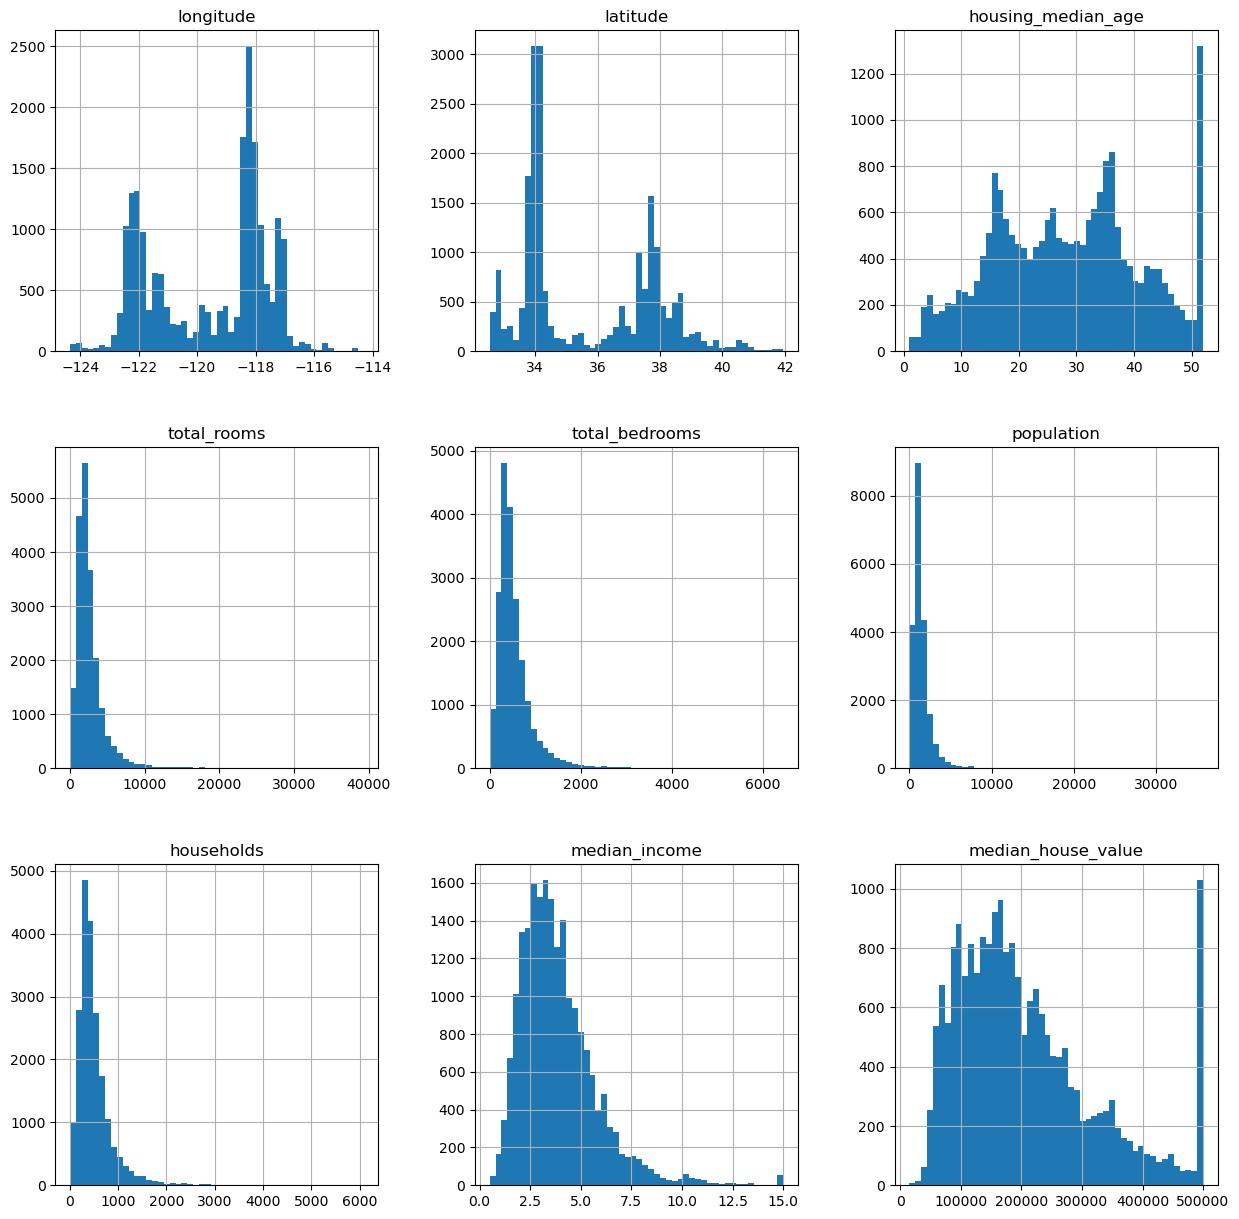

In [6]:
#let's take a look at the distribution of the numerical columns using histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(15,15))
plt.show()

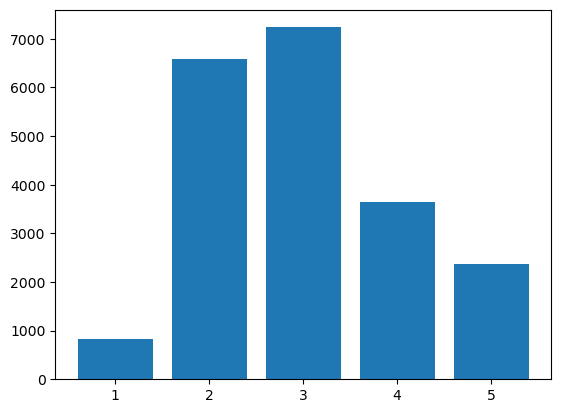

In [7]:
#creating a test set and putting it aside until the model is trained. Since the median_income column is skewed a little bit, we will use stratified sampling
#we want to ensure that the test set is representative of the various categories of incomes in the whole dataset therefore we will use stratified sampling
import numpy as np
housing['income_cat']=pd.cut(housing.median_income, bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])
plt.bar(x=housing.income_cat.value_counts().index, height =housing.income_cat.value_counts().values)
plt.show()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits =1, test_size =0.2, random_state=42)
for train_index, test_index in split.split(housing , housing.income_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set.drop('income_cat', axis=1, inplace=True)
strat_train_set.drop('income_cat', axis=1, inplace=True)


In [9]:
#lets copy the training dataset to visualize important insights without interfering with the original training set
housing=strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

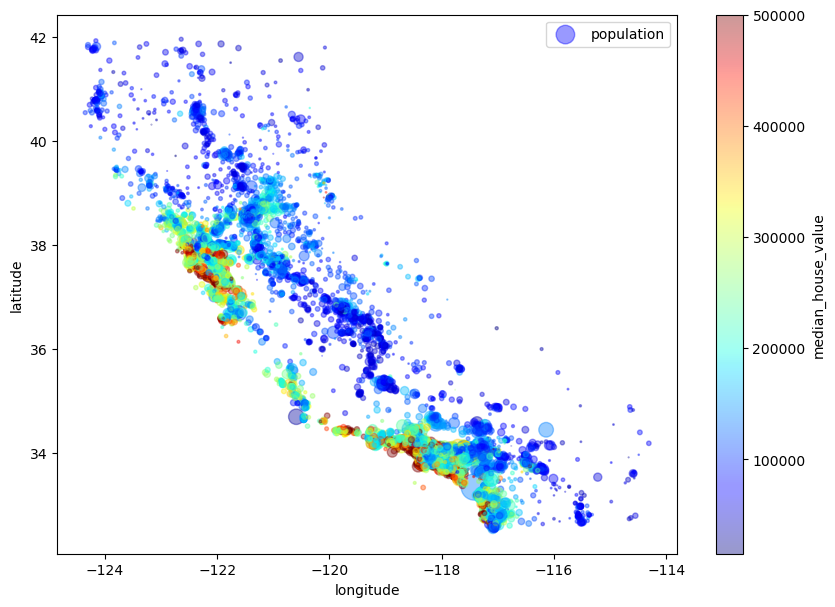

In [10]:
#let's use a scatter plot where the radius of each circle represents the district's population and color represents the price 
housing.plot(kind='scatter', x='longitude', y='latitude', alpha =0.4, s=housing.population/100, label='population', figsize=(10,7), 
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [11]:
housing.drop('ocean_proximity',axis=1).corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Our target variable is highly correlated with the median_income

<Axes: xlabel='median_income', ylabel='median_house_value'>

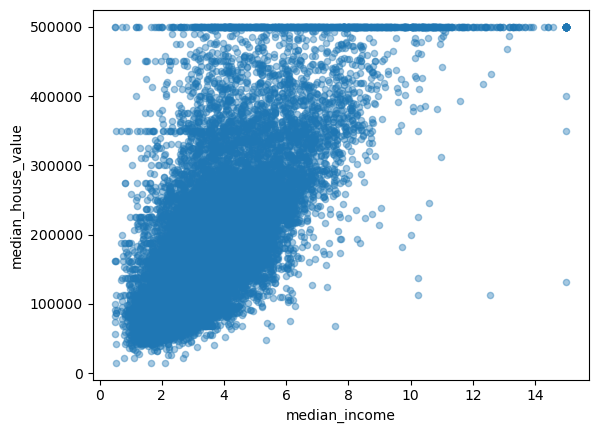

In [12]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.4)

We know that the median_house_value is capped at 500000, we can also observe this in the graph also. The linear relationship is clearly visible in the graph

We will try to create and explore some new features using the existing features


In [13]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

In [14]:
housing.drop('ocean_proximity', axis=1).corr()['median_house_value'].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.687151
rooms_per_household    0.146255
total_rooms            0.135140
housing_median_age     0.114146
households             0.064590
total_bedrooms         0.047781
population            -0.026882
longitude             -0.047466
latitude              -0.142673
bedrooms_per_room     -0.259952
Name: median_house_value, dtype: float64

### Preparing the data for Machine learning algorithm

In [15]:
housing=strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [16]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

Since there are some missing values in the total bedrooms column. We need to perform some missing value analysis to handle it.
let's take a look at the percent of values missing in the column

In [18]:
(housing['total_bedrooms'].isnull().sum()/len(housing['total_bedrooms'])) * 100

0.9568798449612402

Less than 1% of values are missing in the column therefore we can impute the missing values.
- We can impute using median value or mean value

<Axes: >

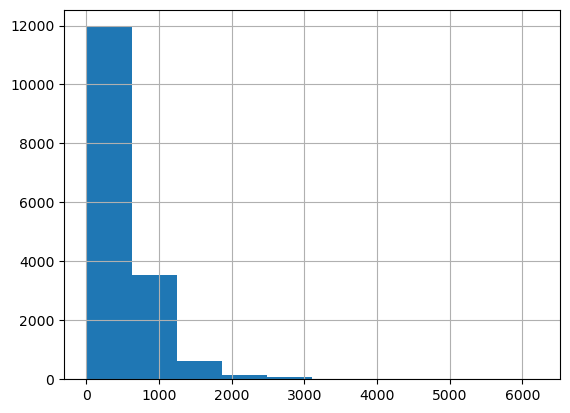

In [19]:
housing['total_bedrooms'].hist()

Since it is skewed data, we will impute using median value

In [22]:
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(),inplace=True)

In [21]:
housing['total_bedrooms'].median()

433.0

In [23]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

We have successfully imputed the missing values

Another better way of imputing missing value is using the imputer class of sklearn, since we need to save the imputed value so that we can further use the same value to impute in the missing values of test set.


In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [26]:
housing_num = housing.drop('ocean_proximity', axis=1) #since median can only be calculated on numerical data
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Now we can use this trained imputer to transform the training set by replacing missing values by the learned statistics.

In [28]:
X=imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns= housing_num.columns)


Now we will take care of the category column since it is textual data. We will use onehotencoding to take care of them since there is no order in the data


In [30]:
housing_cat= housing[['ocean_proximity']]
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [31]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

We can observe that this is scipy sparse matrix instead of being a dense numpy array because most of the values in the column are zero therefore it will be a waste of memory to store all the zero values hence we only store the location of non-zero values

Until now we looked at the Transformer classes available to us, now we will look how we can create our own custom transformer classes to use methods available such as fit(), fit_transform().
For example here is a small custom transformer class that add the custom attributes we discussed earlier to our dataset. This defines a custom scikit‑learn transformer that computes and appends engineered ratio features (rooms per household, population per household, and optionally bedrooms per room) to the input array, while complying with sklearn’s estimator API for use in pipelines

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin): #Declares a transformer class that inherits sklearn’s BaseEstimator and TransformerMixin so it can work in pipelines, be cloned, and support get_params/set_params and fit_transform.
    def __init__(self, add_bedrooms_per_room = True): #no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None): 
        return self #nothing else to do here
    def transform(self, X, y=None): # X is expected to be a NumPy array with the columns at indices 3–6 in the specified order. If working with pandas DataFrames, ensure the right conversion or adapt to column names.
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]        

In [33]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attr_adder.fit_transform(housing.values)


In [35]:
housing_extra_attributes[:10]

array([[-121.46, 38.52, 29.0, 3873.0, 797.0, 2237.0, 706.0, 2.1736,
        'INLAND', 5.485835694050992, 3.168555240793201],
       [-117.23, 33.09, 7.0, 5320.0, 855.0, 2015.0, 768.0, 6.3373,
        'NEAR OCEAN', 6.927083333333333, 2.6236979166666665],
       [-119.04, 35.37, 44.0, 1618.0, 310.0, 667.0, 300.0, 2.875,
        'INLAND', 5.3933333333333335, 2.223333333333333],
       [-117.13, 32.75, 24.0, 1877.0, 519.0, 898.0, 483.0, 2.2264,
        'NEAR OCEAN', 3.886128364389234, 1.8592132505175984],
       [-118.7, 34.28, 27.0, 3536.0, 646.0, 1837.0, 580.0, 4.4964,
        '<1H OCEAN', 6.096551724137931, 3.1672413793103447],
       [-122.04, 37.96, 28.0, 1207.0, 252.0, 724.0, 252.0, 3.6964,
        'NEAR BAY', 4.7896825396825395, 2.873015873015873],
       [-122.03, 37.33, 23.0, 4221.0, 671.0, 1782.0, 641.0, 7.4863,
        '<1H OCEAN', 6.585023400936038, 2.78003120124805],
       [-118.31, 34.2, 36.0, 1692.0, 263.0, 778.0, 278.0, 5.0865,
        '<1H OCEAN', 6.086330935251799, 2.798

This transformer can be plugged into sklearn Pipeline or ColumnTransformer; the add_bedrooms_per_room parameter can be toggled or tuned in grid search.

Now we will use a transformer pipeline to implement all the respective classes which we have used to preprocess and clean our data along with scaling the numerical features.

**As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).**

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()) #the last estimator must have the transform method at all costs
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [38]:
#now we will create a pipeline for categorical column, 
#It will be helpful to have a single transformer able to handle all columns.
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing)

### Now we will select and train our models

In [39]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(housing_prepared, housing_labels)
#taking some data to use this fitted model to predict some values
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predicted values", linreg.predict(some_data_prepared))
print("Actual values", list(some_labels))

Predicted values [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Actual values [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [40]:
#let us compute the most important metric for linear regression which is mean squared error
from sklearn.metrics import mean_squared_error
predicted_values = linreg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

We can observe that we are getting a very large mean squared error on our training data which depicts that our model is underfitting the data, therefore we need to try some stronger models 

In [42]:
#now we will use decision tree model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
predicted_values = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

We can clearly observe that our decision tree is clearly overfitting the data, since we cannot use model on our test set until we are confident on our model, therefore we will use **cross-validation** to see how our model is performing on unseen data.

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
print("scores", tree_rmse_scores)
print("mean ", tree_rmse_scores.mean())
print("standard deviation", tree_rmse_scores.std())

scores [72140.62737431 71391.53426993 67561.03609496 72874.19799504
 69251.9030216  76924.23845234 71259.91277649 72205.08306895
 67739.97189018 69936.37347434]
mean  71128.48784181224
standard deviation 2608.8242237611735


We can observe that decision tree might be performing even worse than the linear regression algorithm. To verify let us compute similar cross-validation scores for the linear regression model

In [48]:
linregscores = cross_val_score(linreg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
linregrmse = np.sqrt(-linregscores)
print("scores ", linregrmse)
print("Mean", linregrmse.mean())
print('standard deviation', linregrmse.std())

scores  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean 69104.07998247063
standard deviation 2880.328209818062


Yep, the decision tree model is overfitting so badly that it is even performing worse than the underfitted linear regression model

In [50]:
#let's try random forests model
from sklearn.ensemble import RandomForestRegressor
rndmforest = RandomForestRegressor()
rndmforest.fit(housing_prepared, housing_labels)
print('Training error: ', np.sqrt(mean_squared_error(housing_labels, rndmforest.predict(housing_prepared))))
#let's perform cross - validation to get an idea of test error 
rndm_score = cross_val_score(rndmforest, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv =10)
rndm_rmse = np.sqrt(-rndm_score)
print("Cross validation score: ",rndm_rmse )
print("Mean ", rndm_rmse.mean())
print("Standard Deviation: ", rndm_rmse.mean())

Training error:  18746.8868520496
Cross validation score:  [51434.13304061 49337.45210832 46796.29280397 52149.64314716
 47496.48264052 51758.19118477 52471.58243908 49637.48124936
 48473.92950425 53979.72419954]
Mean  50353.49123175871
Standard Deviation:  50353.49123175871


We can observe that the training error is less than the cross validation error which means that my random forest model is still overfitting the data, therefore we need to finetune some parameters so that we can manage the problem of overfitting. We will be using **GridSearCV** or **RandomSearchCV** for our hyperparameter tuning. 

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3,10], 'max_features':[2,3,4]}
]
forest_reg = RandomForestRegressor()
gridsearch = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)
gridsearch.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

This `param_grid` tells scikitlearn to:
- First evaluate 3*4 =12 combinations `n_estimators` and `max_features`.
- Then try all 2*3=6 combinations of hyperparameter values in the second `dict`, but this time with hyperparameter `bootstrap` at False.
- All in all, grid search will explore 12+6=18 combinations of hyperparameters.
- Since it will cross validate each model five times, there will be 18*5 rounds of training.

In [52]:
#getting the best combination of parameters
gridsearch.best_params_

{'max_features': 6, 'n_estimators': 30}

In [53]:
#getting the best estimator directly
gridsearch.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [56]:
#taking a look at the evaluation scores
cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64323.576357884056 {'max_features': 2, 'n_estimators': 3}
55220.00692429923 {'max_features': 2, 'n_estimators': 10}
52649.573498299695 {'max_features': 2, 'n_estimators': 30}
60184.32310722372 {'max_features': 4, 'n_estimators': 3}
52826.22894991525 {'max_features': 4, 'n_estimators': 10}
50263.400185374354 {'max_features': 4, 'n_estimators': 30}
59451.674503310795 {'max_features': 6, 'n_estimators': 3}
52345.27633652913 {'max_features': 6, 'n_estimators': 10}
49930.62642596338 {'max_features': 6, 'n_estimators': 30}
59328.6695965724 {'max_features': 8, 'n_estimators': 3}
52417.59248069165 {'max_features': 8, 'n_estimators': 10}
50018.409570952594 {'max_features': 8, 'n_estimators': 30}
63766.78935172385 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54726.70197328643 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59689.72681759546 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52577.983313316916 {'bootstrap': False, 'max_features': 3, 'n_estimators

We can observe that our error has reduced after finetuning of hyperparameters. Now let us take a look at the important features useful in prediction of the target column.

In [57]:
feature_importances = gridsearch.best_estimator_.feature_importances_
feature_importances

array([7.98825052e-02, 7.14421929e-02, 4.10163868e-02, 1.90859251e-02,
       1.62298938e-02, 1.80098274e-02, 1.63457502e-02, 3.06383022e-01,
       7.22427518e-02, 1.06209470e-01, 7.05934266e-02, 9.83014906e-03,
       1.62562137e-01, 7.86871109e-05, 5.95734571e-03, 4.13052970e-03])

In [58]:
#lets display these important scores next to their corresponding attribute names:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.30638302169079595, 'median_income'),
 (0.1625621365791647, 'INLAND'),
 (0.10620947035105636, 'pop_per_hhold'),
 (0.07988250523480375, 'longitude'),
 (0.07224275184445396, 'rooms_per_hhold'),
 (0.07144219289930578, 'latitude'),
 (0.07059342663853954, 'bedrooms_per_room'),
 (0.04101638684100914, 'housing_median_age'),
 (0.019085925051053887, 'total_rooms'),
 (0.018009827355594126, 'population'),
 (0.016345750166321008, 'households'),
 (0.01622989375850199, 'total_bedrooms'),
 (0.009830149062847864, '<1H OCEAN'),
 (0.005957345714755007, 'NEAR BAY'),
 (0.004130529700885237, 'NEAR OCEAN'),
 (7.868711091159877e-05, 'ISLAND')]

In [60]:
#let us evaluate our model on the test set
final_model = gridsearch.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_mse = mean_squared_error(y_test, final_model.predict(X_test_prepared))
final_rmse=np.sqrt(final_mse)
final_rmse

47695.971182136724

In [62]:
#let us compute the 95% confidence interval for the generalization error
from scipy import stats
confidence = 0.95
squared_errors = (final_model.predict(X_test_prepared) - y_test) **2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale = stats.sem(squared_errors)))

array([45733.5900067 , 49580.74302704])